___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#### Load Dataset

In [47]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [48]:
df['Income']=df['Annual Income (k$)']
df['Spend_Score']=df['Spending Score (1-100)']

df =df.drop(columns=['Spending Score (1-100)','Annual Income (k$)','CustomerID'])

In [9]:
df

,CustomerID,Gender,Age,Income,Spend_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       200 non-null    object
 1   Age          200 non-null    int64 
 2   Income       200 non-null    int64 
 3   Spend_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [14]:
# df['Gender'].replace(['Male','Female'],[0,1])
# df.Gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

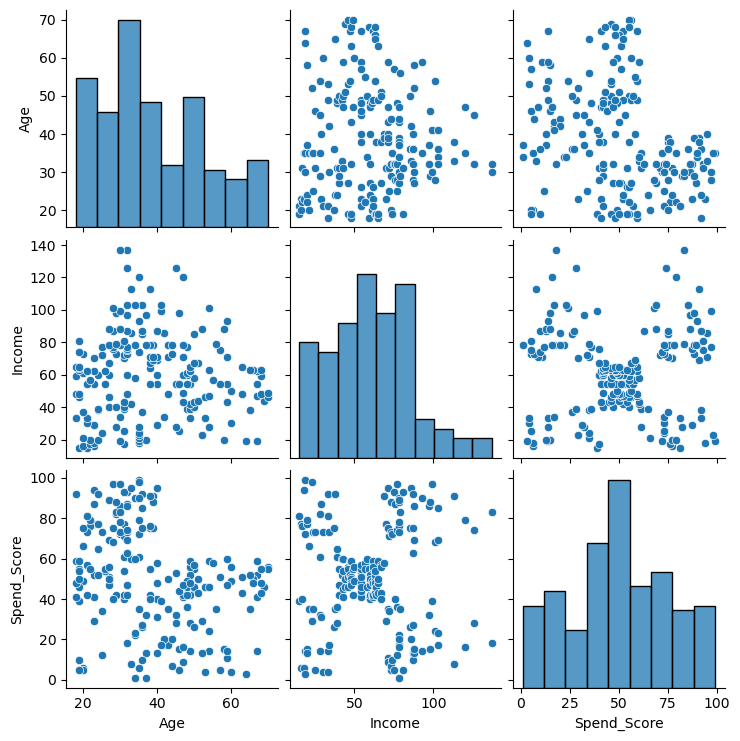

In [20]:
sns.pairplot(df)
plt.show()

# We can get an idea by looking at the scatterplot that "does our data tend to cluster or not?"
# If so, "how many clusters can I divide?"
# We should keep in mind the ideal clustering logic, which we specify as minimal intra cluster distance
# and maximal inter cluster distance, at every stage of clustering problems.

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spend_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

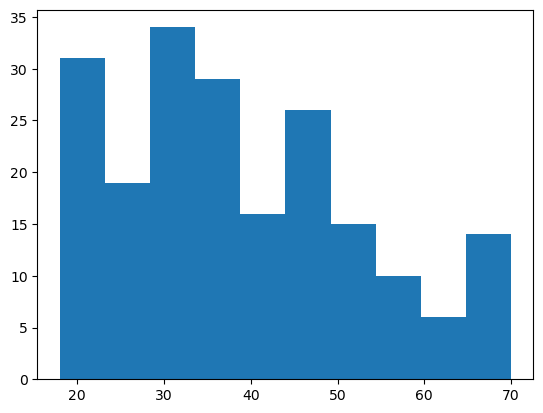

In [26]:
plt.hist(df['Age'])

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

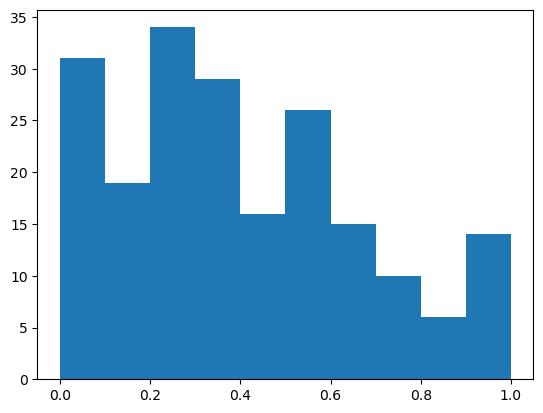

In [33]:
from sklearn.preprocessing import MinMaxScaler


d=df.Age
scaler = MinMaxScaler() 
d=pd.DataFrame(d)
data_scaled = scaler.fit_transform(d)
plt.hist(data_scaled)

In [49]:
df['Gender']=df['Gender'].replace(['Male','Female'],[0,1])
df

,Gender,Age,Income,Spend_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


## No need to scale the data

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [42]:
Age_Spend=df[['Age','Spend_Score']]
Age_Spend

,Age,Spend_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [76]:
def Elbow_inertia(data): 
        ssd = []

        K = range(2,10)

        for k in K:
            model = KMeans(n_clusters =k,
                        random_state=42)
            model.fit(data)
            ssd.append(model.inertia_) # inertia --> sum of the distances of the observations in the clusters from their centroids.
    
        plt.plot(K, ssd, "bo--")
        plt.xlabel("Different k values")
        plt.ylabel("inertia-error")
        plt.title("Elbow method")

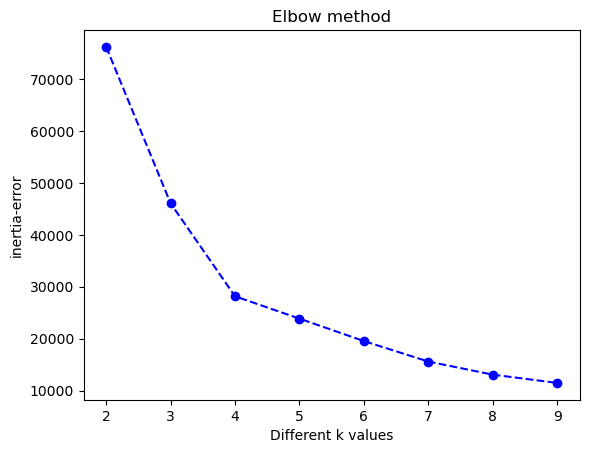

In [77]:
Elbow_inertia(Age_Spend)

In [63]:
model = KMeans(n_clusters =5,
                   random_state=42)
model.fit(Age_Spend)
print(model.inertia_)
model = KMeans(n_clusters =7,
                   random_state=42)
model.fit(Age_Spend)
print(model.inertia_)

23811.52352472089
15514.193134351031


In [81]:
def Elbow_distortion(data):
    distortion = []
    for k in range(2, 10):
        kmeanModel = KMeans(n_clusters=k,
                            random_state=42)
        kmeanModel.fit(data)
        distances = kmeanModel.transform(data) # distances from each observation to each cluster centroid
        labels = kmeanModel.labels_
        result = []
        for i in range(k):
            cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
            result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
        distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list


    plt.plot(range(2, 10), distortion, "ro--")
    plt.xlabel("Different k values")
    plt.ylabel("distortion")
    plt.title("Elbow method")

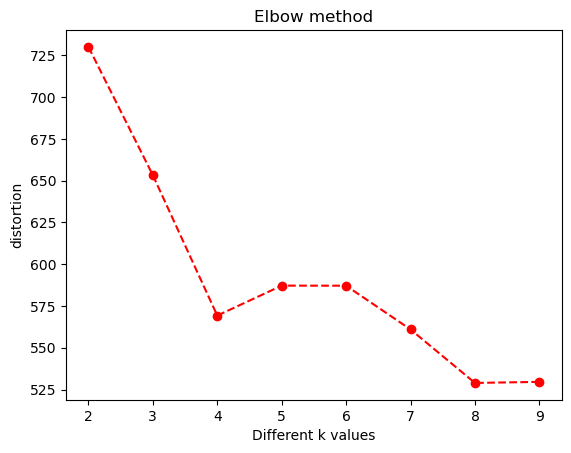

In [82]:
Elbow_distortion(Age_Spend)

In [50]:
# function to compute hopkins's statistic for the dataframe X
# hopkins : A statistical method that measures data clustering tendency.
# More than 0.5 is prone to clustering.

def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [55]:
hopkins(Age_Spend, 0.05)

0.6881053043183141

In [59]:
hopkins(Age_Spend, 1)

0.721010065729001

In [69]:
# measures the quality of the clustering
# **both inter cluster distance and intra cluster distance are taken into account**
# ranges[-1,1], bad to good respectively


for N_clus in range(2,10):
    KM_model = KMeans(n_clusters =N_clus,
                      random_state=42)
    KM_model.fit(Age_Spend)
    s=silhouette_score(Age_Spend, KM_model.labels_)
    print(f"For n_clusters={N_clus}, the silhouette score is {s}")

For n_clusters=2, the silhouette score is 0.4686685639353608
For n_clusters=3, the silhouette score is 0.45236417162972664
For n_clusters=4, the silhouette score is 0.5018968750369411
For n_clusters=5, the silhouette score is 0.4455223056320923
For n_clusters=6, the silhouette score is 0.4410987396199049
For n_clusters=7, the silhouette score is 0.4220310908527047
For n_clusters=8, the silhouette score is 0.43370315583322805
For n_clusters=9, the silhouette score is 0.4174610733513148


### Why silhouette_score is negative?

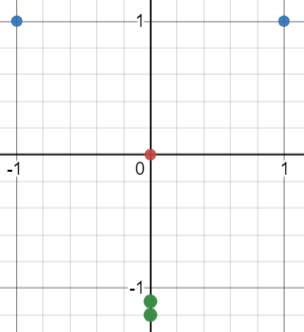

#### *iii. Apply K Means*

In [86]:
KM_model1 = KMeans(n_clusters =4, # 4--> according to above charts
                   random_state=42)
KM_model1.fit(Age_Spend)
KM_model1.predict(Age_Spend)
KM_model1.fit_predict(Age_Spend)
Age_Spend["predicted_clusters"] = KM_model1.labels_
Age_Spend

,Age,Spend_Score,predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


In [87]:
centers = KM_model1.cluster_centers_
centers

array([[5.57083333e+01, 4.82291667e+01, 8.88178420e-16],
       [3.01754386e+01, 8.23508772e+01, 1.00000000e+00],
       [4.32916667e+01, 1.50208333e+01, 2.00000000e+00],
       [2.76170213e+01, 4.91489362e+01, 3.00000000e+00]])

#### *iv. Visualizing and Labeling All the Clusters*

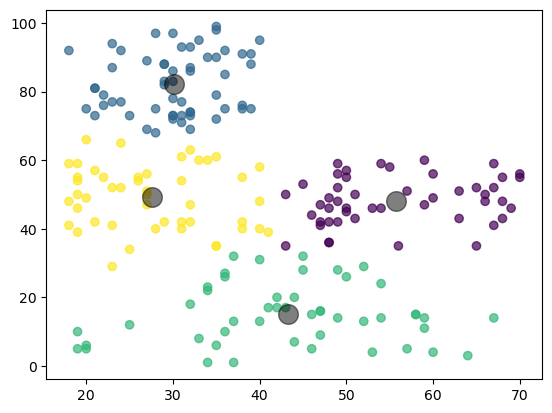

In [73]:
plt.scatter(Age_Spend.Age,
            Age_Spend.Spend_Score,
            c=Age_Spend.predicted_clusters,
            cmap="viridis",
            alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [74]:
Income_Spend=df[['Income','Spend_Score']]
Income_Spend

,Income,Spend_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

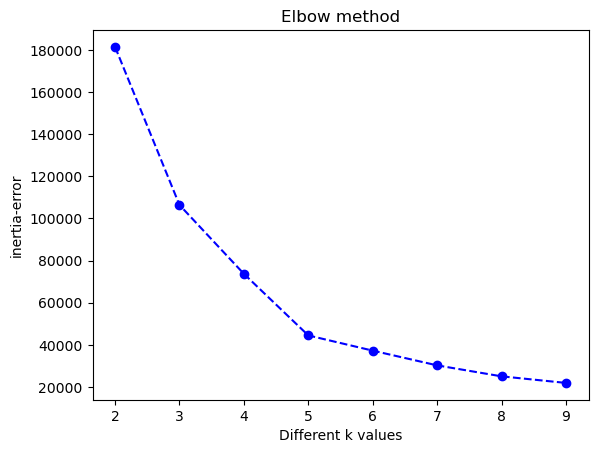

In [78]:
Elbow_inertia(Income_Spend) 

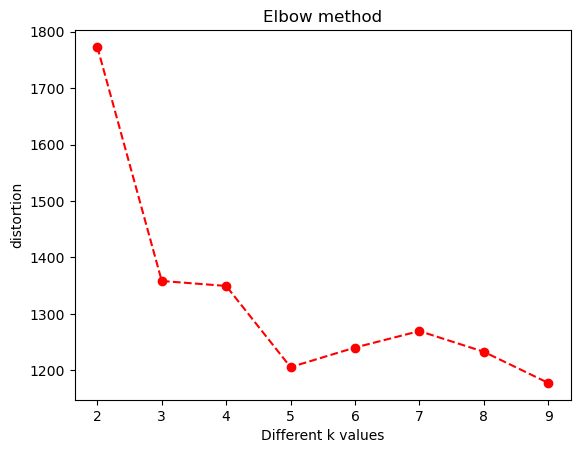

In [83]:
Elbow_distortion(Income_Spend)

In [84]:
hopkins(Income_Spend, 0.05)

0.662852223715278

In [85]:
for N_clus in range(2,10):
    KM_model = KMeans(n_clusters =N_clus, 
                   random_state=42)
    KM_model.fit(Income_Spend)
    s=silhouette_score(Income_Spend, KM_model.labels_)
    print(f"For n_clusters={N_clus}, the silhouette score is {s}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367


#### *iii. Apply K Means*

In [97]:
KM_model2 = KMeans(n_clusters =5, # 5--> according to above charts
                   random_state=42)
KM_model2.fit(Income_Spend)
KM_model2.predict(Income_Spend)
KM_model2.fit_predict(Income_Spend)
Income_Spend["predicted_clusters"] = KM_model2.labels_
# Income_Spend["predicted_clusters"]=KM_model2.fit_predict(Age_Spend)
Income_Spend

,Income,Spend_Score,predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [98]:
centers = KM_model2.cluster_centers_
centers

array([[5.52962963e+01, 4.95185185e+01, 2.48148148e+00],
       [8.65384615e+01, 8.21282051e+01, 5.12820513e-02],
       [2.57272727e+01, 7.93636364e+01, 2.72727273e-01],
       [8.82000000e+01, 1.71142857e+01, 2.57142857e+00],
       [2.63043478e+01, 2.09130435e+01, 2.34782609e+00]])

#### *iv. Visualizing and Labeling All the Clusters*

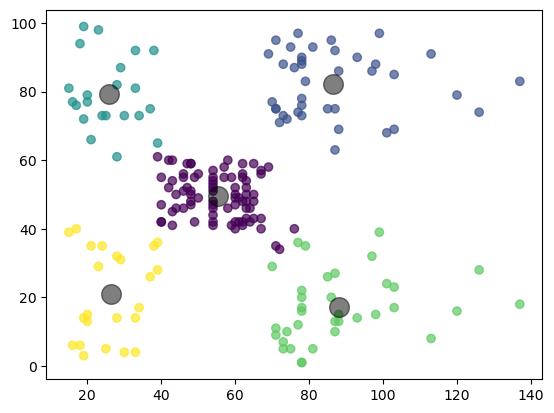

In [99]:
plt.scatter(Income_Spend.Income,
            Income_Spend.Spend_Score,
            c=Income_Spend.predicted_clusters,
            cmap="viridis",
            alpha=0.7)  # X.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [105]:
x1=Age_Spend.drop(columns='predicted_clusters')
x1

,Age,Spend_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [122]:
def dendogramer(methos,link):
    plt.title(methos)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

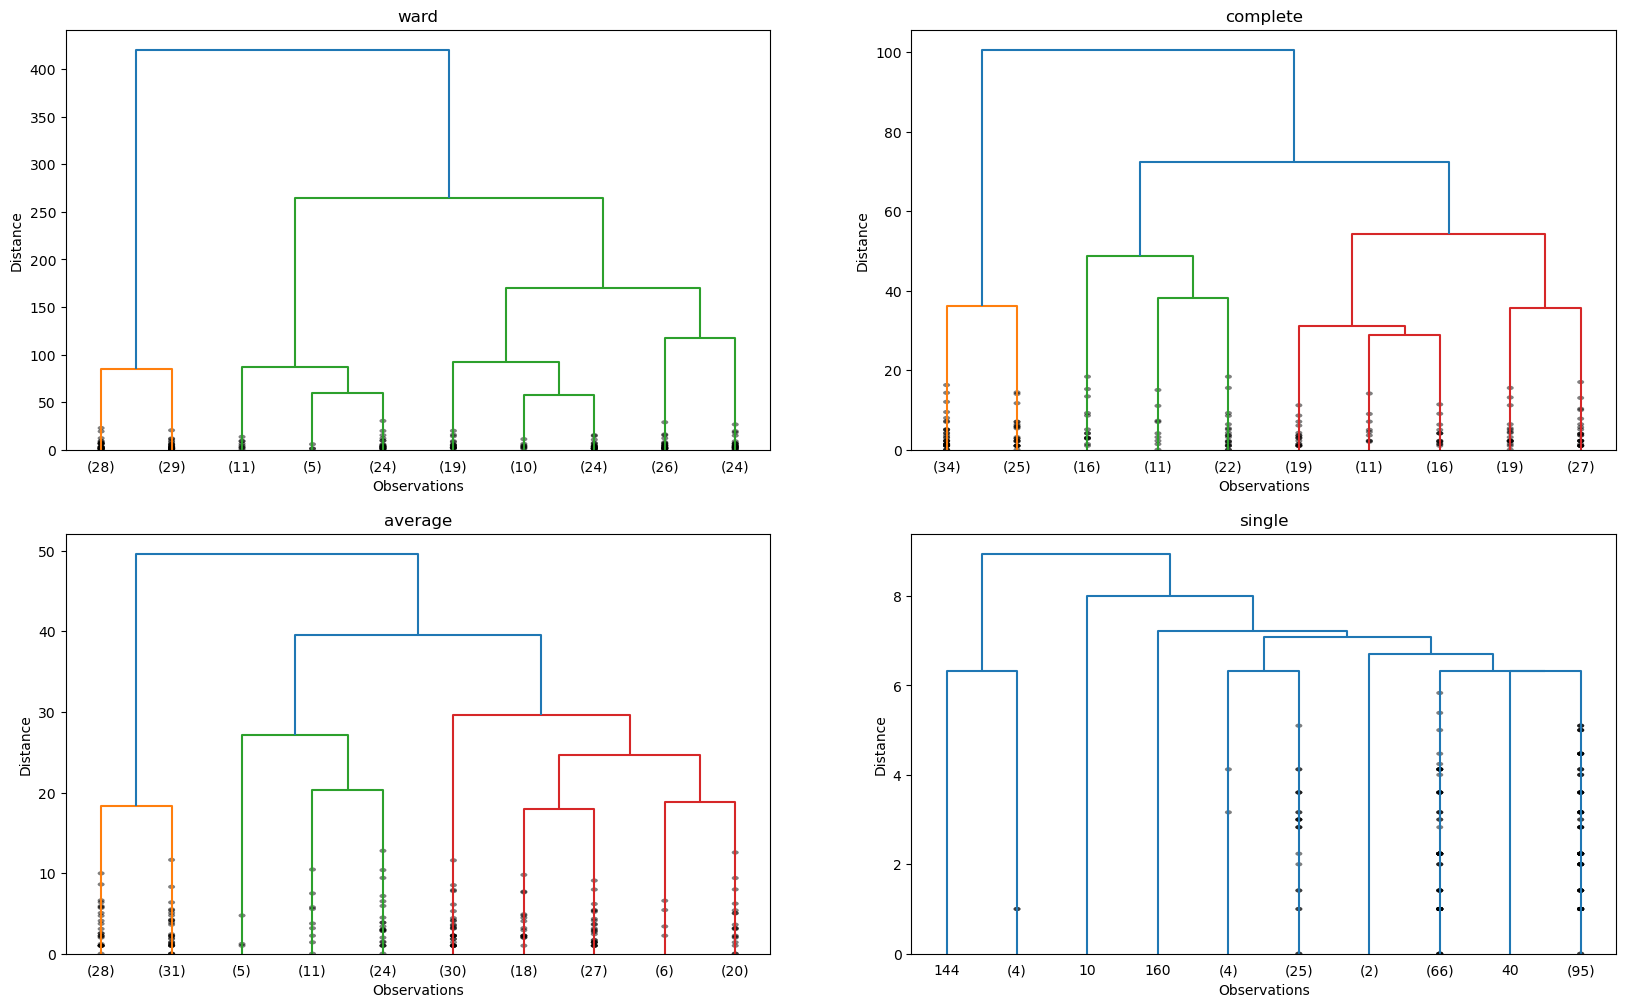

In [126]:
plt.figure(figsize=(20,12))
linkages={'ward':linkage(y=x1, method="ward"),
          'complete':linkage(x1, "complete"),
          'average':linkage(x1, "average"),
          'single':linkage(x1, "single")}

i=221 
for k,v in linkages.items():
    plt.subplot(i)
    dendogramer(k,v)
    i=i+1
    

### silhouette_score


In [127]:
from sklearn.cluster import AgglomerativeClustering


K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(x1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(x1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


### Silhouette Score for 4 clusters: 0.4602496389565028

## Clustering based on Annual Income and Spending Score- x2

In [132]:
x2=Income_Spend.drop(columns='predicted_clusters')
x2

,Income,Spend_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


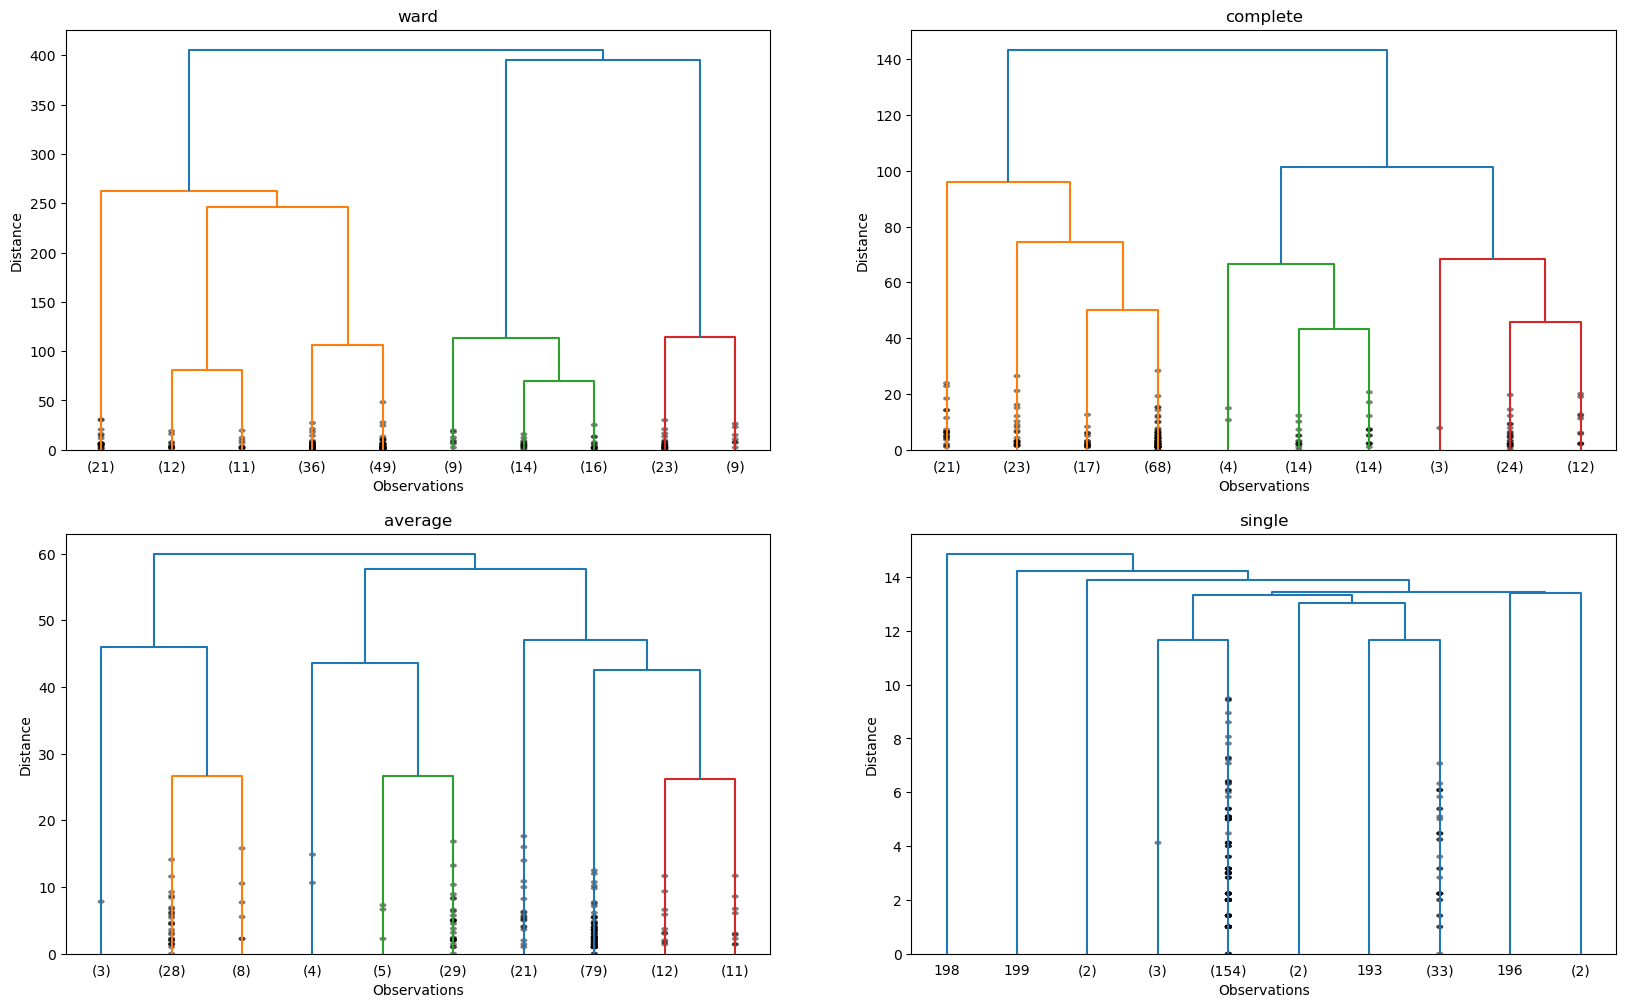

In [129]:
plt.figure(figsize=(20,12))
linkages={'ward':linkage(y=x2, method="ward"),
          'complete':linkage(x2, "complete"),
          'average':linkage(x2, "average"),
          'single':linkage(x2, "single")}

i=221 
for k,v in linkages.items():
    plt.subplot(i)
    dendogramer(k,v)
    i=i+1
    

In [133]:
for k in range(2,10):
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(x2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(x2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


### Silhouette Score for 5 clusters: 0.5529945955148897

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [142]:
Agg_x1 = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',  
    linkage='ward')  


In [190]:
Age_Spend=Age_Spend.rename(columns={'predicted_clusters':'Knn_predicted'})
Age_Spend['Agg_predicted']=Agg_x1.fit_predict(x1)
Age_Spend

,Age,Spend_Score,Knn_predicted,Agg_predicted
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


#### Annual Income and Spending Score- x2

In [145]:
Agg_x2 = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',  
    linkage='ward') 

In [188]:
Income_Spend=Income_Spend.rename(columns={'predicted_clusters':'Knn_predicted'})
Income_Spend['Agg_predicted']=Agg_x2.fit_predict(x2)
Income_Spend

,Income,Spend_Score,Knn_predicted,Agg_predicted
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: title={'center': 'Agg_predicted'}, xlabel='Age', ylabel='Spend_Score'>

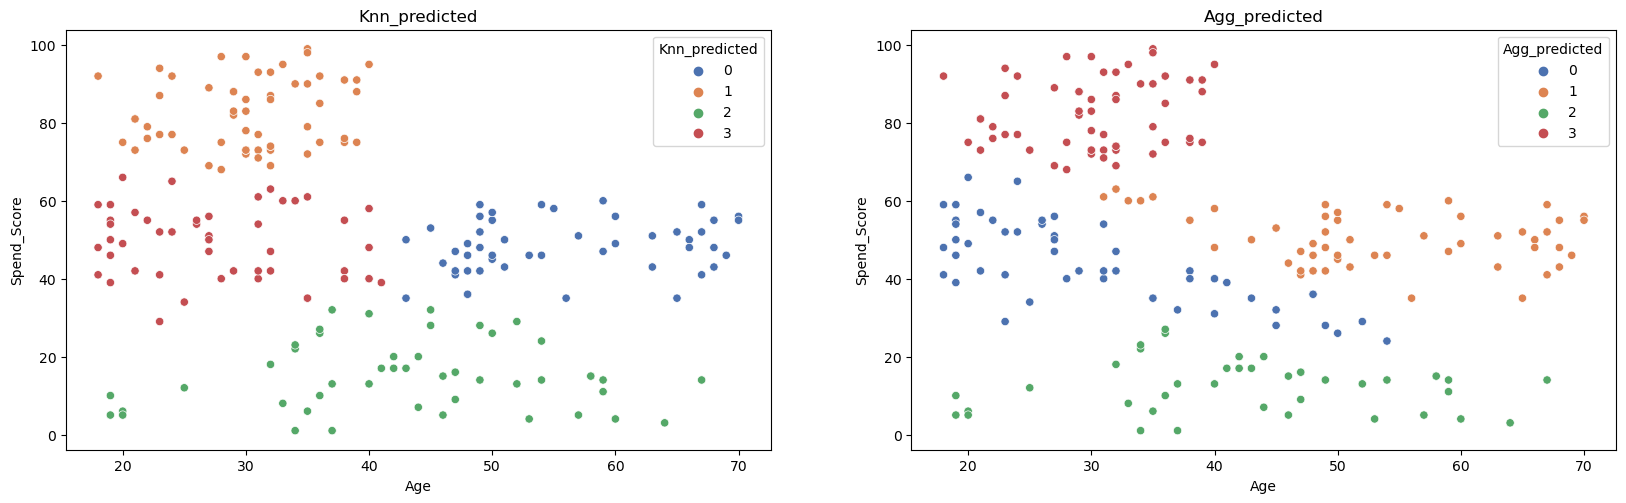

In [191]:
plt.figure(figsize=(20,12))
plt.subplot(221)
plt.title("Knn_predicted")
sns.scatterplot(x=Age_Spend.Age,
            y=Age_Spend.Spend_Score,
            hue=Age_Spend.Knn_predicted,
            data=Age_Spend,
            palette="deep"
            # cmap="viridis",
            # alpha=0.7
            ) 
# ##########
plt.subplot(222)
plt.title("Agg_predicted")
sns.scatterplot(x=Age_Spend.Age,
            y=Age_Spend.Spend_Score,
            hue=Age_Spend.Agg_predicted,
            data=Age_Spend,
            palette="deep"
            # cmap="viridis",
            # alpha=0.7,
            )



#### Annual Income and Spending Score- x2

<Axes: title={'center': 'Agg_predicted'}, xlabel='Income', ylabel='Spend_Score'>

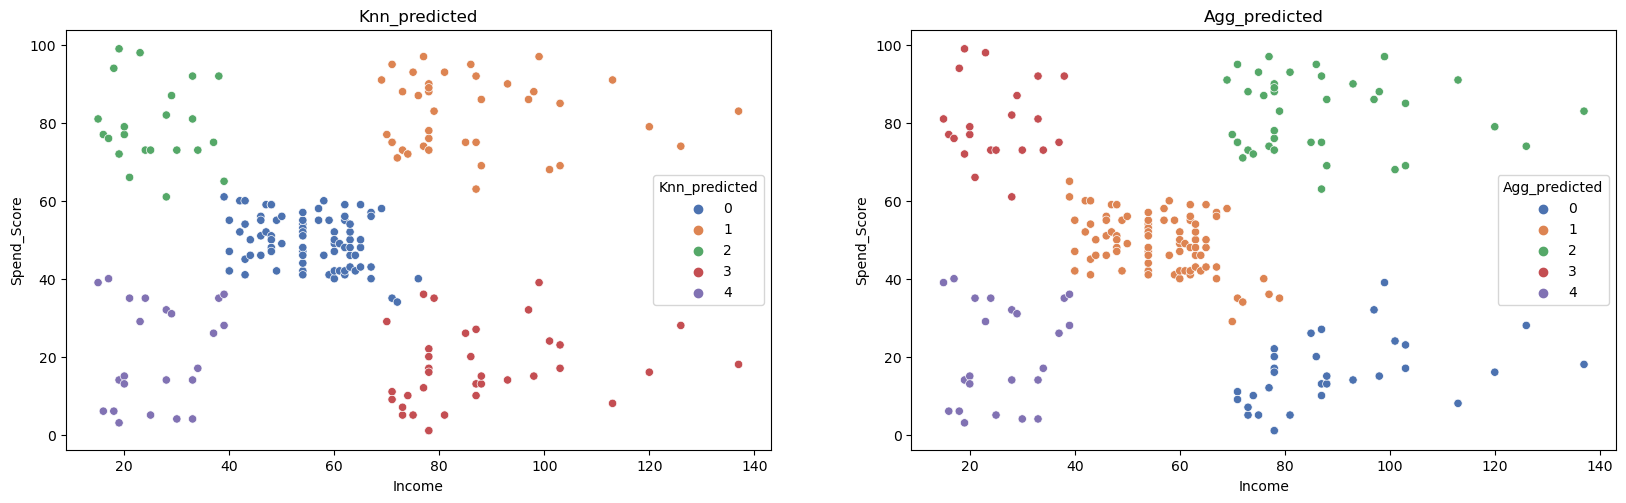

In [173]:
plt.figure(figsize=(20,12))
plt.subplot(221)
plt.title("Knn_predicted")
sns.scatterplot(x=Income_Spend.Income,
            y=Income_Spend.Spend_Score,
            hue=Income_Spend.Knn_predicted,
            data=Age_Spend,
            palette="deep"
            # cmap="viridis",
            # alpha=0.7
            ) 
# ##########
plt.subplot(222)
plt.title("Agg_predicted")
sns.scatterplot(x=Income_Spend.Income,
            y=Income_Spend.Spend_Score,
            hue=Income_Spend.Agg_predicted,
            data=Age_Spend,
            palette="deep"
            # cmap="viridis",
            # alpha=0.7,
            )



### K Means clustering separate the data point more accurate than Agglomerative Clustering in the case of Age and Spending score with 4 clusters.
### in Agglomerative Clustering the data pointes(clusters) are more Overlapped.

#### Interpretation based on Age and Spending Score- x1

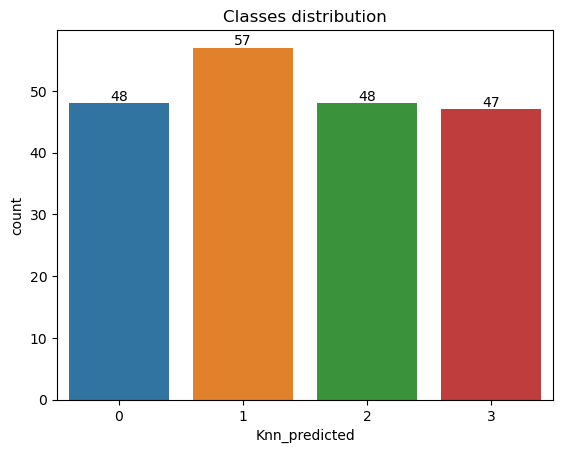

In [180]:
plt.title("Classes distribution")
ax =sns.countplot(x=Age_Spend.Knn_predicted)
for p in ax.containers:
    ax.bar_label(p)

In [181]:
Age_Spend.Knn_predicted.value_counts()

Knn_predicted
1    57
2    48
0    48
3    47
Name: count, dtype: int64

In [192]:
df["cluster_Age_Spend_Score"] = Age_Spend.Knn_predicted
df.head()

,Gender,Age,Income,Spend_Score,cluster_Age_Spend_Score
0,0,19,15,39,3
1,0,21,15,81,1
2,1,20,16,6,2
3,1,23,16,77,1
4,1,31,17,40,3


In [195]:
# Age_Spend=Age_Spend.drop(columns=['Agg_predicted'])
df.groupby(['cluster_Age_Spend_Score']).mean()

,Gender,Age,Income,Spend_Score
cluster_Age_Spend_Score,,,,
0,0.541667,55.708333,54.770833,48.229167
1,0.578947,30.175439,66.070175,82.350877
2,0.500000,43.291667,66.937500,15.020833
3,0.617021,27.617021,53.276596,49.148936


### Conclusion

The things that I changed (it different in my implementation ) I wrote it in **bold**

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around **30**, the annula_income is high and **the spending_scores are also is high**.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around **43**. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around **27**.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

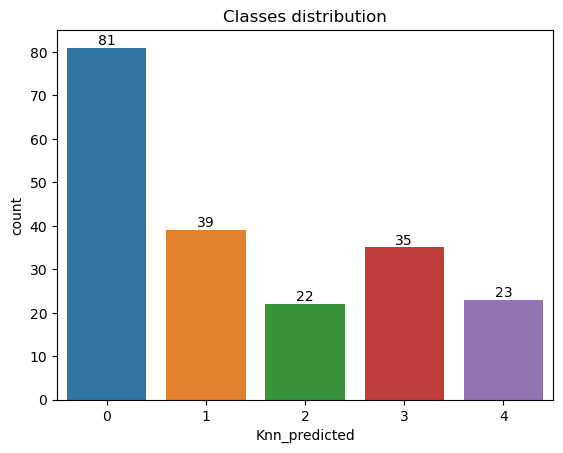

In [196]:
plt.title("Classes distribution")
ax =sns.countplot(x=Income_Spend.Knn_predicted)
for p in ax.containers:
    ax.bar_label(p)

In [198]:
df["cluster_Incom_Spend_Score"] = Income_Spend.Knn_predicted
df=df.drop(columns=['cluster_Age_Spend_Score'])
df.head()

,Gender,Age,Income,Spend_Score,cluster_Incom_Spend_Score
0,0,19,15,39,4
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,2
4,1,31,17,40,4


In [202]:
df.groupby(['cluster_Incom_Spend_Score','Gender']).mean() # Male --> 0

Age     Income  Spend_Score
cluster_Incom_Spend_Score Gender                                   
0                         0       45.363636  55.212121    50.272727
                          1       40.895833  55.354167    49.000000
1                         0       33.277778  87.111111    82.666667
                          1       32.190476  86.047619    81.666667
2                         0       25.000000  25.777778    77.666667
                          1       25.461538  25.692308    80.538462
3                         0       39.315789  85.894737    12.947368
                          1       43.250000  90.937500    22.062500
4                         0       48.333333  24.666667    19.666667
                          1       43.214286  27.357143    21.714286

## Conclusion

The things that I changed (it different in my implementation ) I wrote it in **bold**

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around **32**, both annula_income and **spending_scores is high**. **This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.**  

**cluster 2** :The average age is around **25**. **Low annual_incomes but very high spending scores.**
**This group does a lot of shopping, but they do not bring much profit.** 

**cluster 3**: The average age is around **43**. **The annual_incomes are very high but very low spending scores. It can be directed to shopping with gift certificates.**

**cluster 4**: The average age is around **43**, both the annual income and **the spending_score is low. This group is our target audience and special strategies need to be developed for this group.**

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around **33**, both annula_income and **spending_scores is high**. **This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.**  

**cluster 2** :The average age is around **25**. **Low annual_incomes but very high spending scores.**
**This group does a lot of shopping, but they do not bring much profit.** 

**cluster 3**: The average age is around **39**. **The annual_incomes are very high but very low spending scores. It can be directed to shopping with gift certificates.**

**cluster 4**: The average age is around **48**, both the annual income and **the spending_score is low. This group is our target audience and special strategies need to be developed for this group.**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___